In [207]:
# Stefana Ciustea 
# CS 310 - Python for Data Science course
# Assignment 6

# TASK:
# Feature engineering and improve the model accuracy.
# Use the advertising data  advertising.csv Download advertising.csv 
# The ML model is to predict the last column "Clicked on Ad". 
# You will split the data into training and testing data sets, 
# then choose and train a classification machine learning algorithm, get the accuracy of your model. 
# You don't have to use the model we learned in class. Any other model from the textbook is fine as long as it works.
# Then you will use the feature engineering skills to create new features and improve your model. 
# The goal is to make your model better by feature engineering. Show your effort and improvements on the model. 

#-----------------------------------------------------------------------------------------------------------------------

# PRELIMINARY OBSERVATIONS:
# I opened the advertising data "advertising.csv" in Excel. From there I can observe
# that some columns have already had One-hot encoding (columns: "Male","Clicked on Ad")
# When filtering columns in Excel by the "Daily Internet Usage" it seems that 
# the higher the internet usage time, the fewer ad clicks.

# HYPOTHESIS:
# "Daily Internet Usage" is related to and can predict "Clicked on Ad"

# IMPLEMENTATION:
# 1. I will pre-process the "Daily Internet Usage" values to normalize them by their normal distribution.
# 2. I will extract the feature matrix from the available numerical attributes.
# After looking at the data, there are numerical attributes as well as some strings denoting the "Ad Topic Line", "Country", and "City".



# FOR LATER CONSIDERATION:
# For the columns "Country" and "City", I'll apply One-hot encoding directly.
# For Ad Topic Line, I'll convert to lower case, eliminate the punctuation, and filter out the stopwords.
# After this is done, I'll implement a Random Forest model to predict whether an ad is clicked on or not.

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

advertising_df = pd.read_csv('advertising.csv')
advertising_df.keys()
advertising_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [209]:
num_advertising_df = advertising_df.drop('Timestamp', axis=1)
num_advertising_df = num_advertising_df.drop('Ad Topic Line', axis=1)
num_advertising_df = num_advertising_df.drop('City', axis=1)
num_advertising_df = num_advertising_df.drop('Country', axis=1)
target_col = num_advertising_df['Clicked on Ad']
num_advertising_df = num_advertising_df.drop('Clicked on Ad', axis=1)
num_advertising_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
5,59.99,23,59761.56,226.74,1
6,88.91,33,53852.85,208.36,0
7,66.00,48,24593.33,131.76,1
8,74.53,30,68862.00,221.51,1
9,69.88,20,55642.32,183.82,1


In [210]:
scaler = StandardScaler()
scaler.fit(num_advertising_df)
advertising_num_scaled_data = scaler.transform(num_advertising_df)
advertising_num_scaled_data

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   , -0.96269532],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538,  1.03875025],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905, -0.96269532],
       ..., 
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388,  1.03875025],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208, -0.96269532],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 , -0.96269532]])

In [211]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
pca_5 = PCA(n_components=5,random_state=101)
print(pca_2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [212]:
pca_2.fit(advertising_num_scaled_data)
pca_5.fit(advertising_num_scaled_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=101,
  svd_solver='auto', tol=0.0, whiten=False)

In [213]:
x_pca_2 = pca_2.transform(advertising_num_scaled_data)
x_pca_5 = pca_5.transform(advertising_num_scaled_data)

In [214]:
print("Variance explained by the 2 selected components =", sum(pca_2.explained_variance_ratio_*100))
print("Variance explained by the 5 selected components =", sum(pca_5.explained_variance_ratio_*100))

Variance explained by the 2 selected components = 60.9756733823
Variance explained by the 5 selected components = 100.0


#### Variance explained by the 2 selected components = 60.9756733823
#### Variance explained by the 5 selected components = 100.0
#### This means 2 features account for almost 61% of the variance. 
#### This also means that the other 3 account for around 39% of the variance in our trimmed down data set.

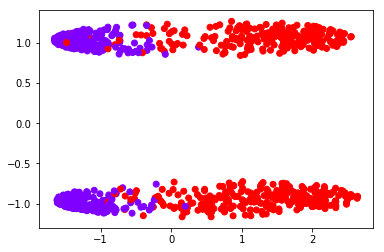

In [215]:
#plt.scatter(x_pca_2[:,0],x_pca_2[:,1],c=num_advertising_df['Clicked on Ad'],cmap='rainbow')
plt.scatter(x_pca_2[:,0],x_pca_2[:,1],c=target_col,cmap='rainbow')

In [216]:
print("Variance explained by all 2")

Variance explained by all 2


In [217]:
df_features

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
5,59.99,23,59761.56,226.74,1
6,88.91,33,53852.85,208.36,0
7,66.00,48,24593.33,131.76,1
8,74.53,30,68862.00,221.51,1
9,69.88,20,55642.32,183.82,1


In [218]:
df_target = pd.DataFrame(target_col, columns=['Clicked on Ad'])
df_target

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, np.ravel(df_target), test_size=0.25, random_state=101) 

In [220]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
first_model = SVC(gamma='auto')

In [221]:
first_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [222]:
first_model_predictions = first_model.predict(x_test)

In [223]:
first_model_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [224]:
confusion_matrix(y_test, first_model_predictions)

array([[  0, 134],
       [  0, 116]])

In [225]:
print(classification_report(y_test, first_model_predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       134
          1       0.46      1.00      0.63       116

avg / total       0.22      0.46      0.29       250



C:\Users\Stefana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [226]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [227]:
first_model_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [228]:
optimization_grid = {'C':[0.1,1.0,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001,0.00001], 'kernel':['rbf']}

In [229]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), optimization_grid, refit= True, verbose=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.512000, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.540000, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.552000, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.540000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ... C=100, gamma=0.001, kernel=rbf, score=0.716000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ... C=100, gamma=0.001, kernel=rbf, score=0.732000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ... C=100, gamma=0.001, kernel=rbf, score=0.700000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .. C=100, gamma=0.0001, kernel=rbf, score=0.780000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    6.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [230]:
grid.best_params_

{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}

In [231]:
grid_predictions=grid.predict(x_test)

In [232]:
print(confusion_matrix(y_test,grid_predictions))

[[115  19]
 [ 13 103]]


### After optimizing using Grid Search, I finally got a workable SVC model;
#### FN (false negative) = 13, FP (false positive) = 19
#### There are still ways for improvement and this is likely because there are 2 groups of clusters:
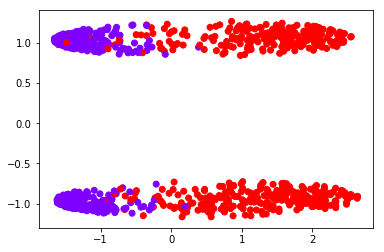

#### Due to the separation between these 2 groups of clusters, it may be more effective to filter and predict each separately

In [233]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.90      0.86      0.88       134
          1       0.84      0.89      0.87       116

avg / total       0.87      0.87      0.87       250



In [241]:
print(pd.DataFrame(pca_2.components_,columns=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male'],index = ['PC-1','PC-2']))


      Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
PC-1                 -0.548083  0.446790    -0.423688             -0.565910   
PC-2                 -0.066157 -0.058262    -0.044059              0.025123   

          Male  
PC-1 -0.014755  
PC-2  0.994815  
